# LOAN APPROVAL PREDICTION

**Data Load**

In [42]:
#!pip install joblib

In [43]:
#!pip uninstall scikit-learn

In [44]:
#!pip install scikit-learn==1.2.2

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,cross_val_score
my_kfold=KFold(n_splits=5)


In [46]:
data=pd.read_csv("/content/loan.csv")
data=data.dropna(how='any',inplace=False)
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [47]:
data=data.drop(["Education","CoapplicantIncome","Loan_ID"],axis=1)
print(data)

     Gender Married Dependents Self_Employed  ApplicantIncome  LoanAmount  \
1      Male     Yes          1            No             4583       128.0   
2      Male     Yes          0           Yes             3000        66.0   
3      Male     Yes          0            No             2583       120.0   
4      Male      No          0            No             6000       141.0   
5      Male     Yes          2           Yes             5417       267.0   
..      ...     ...        ...           ...              ...         ...   
609  Female      No          0            No             2900        71.0   
610    Male     Yes         3+            No             4106        40.0   
611    Male     Yes          1            No             8072       253.0   
612    Male     Yes          2            No             7583       187.0   
613  Female      No          0           Yes             4583       133.0   

     Loan_Amount_Term  Credit_History Property_Area Loan_Status  
1        

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            480 non-null    object 
 1   Married           480 non-null    object 
 2   Dependents        480 non-null    object 
 3   Self_Employed     480 non-null    object 
 4   ApplicantIncome   480 non-null    int64  
 5   LoanAmount        480 non-null    float64
 6   Loan_Amount_Term  480 non-null    float64
 7   Credit_History    480 non-null    float64
 8   Property_Area     480 non-null    object 
 9   Loan_Status       480 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.2+ KB


<Axes: >

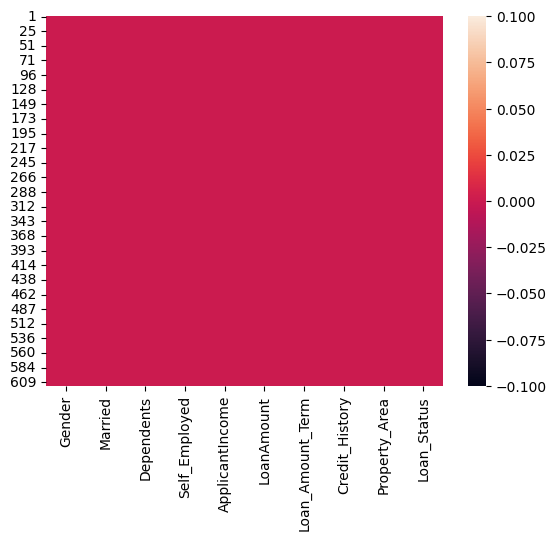

In [49]:
sns.heatmap(data.isnull())

<Axes: xlabel='Gender', ylabel='count'>

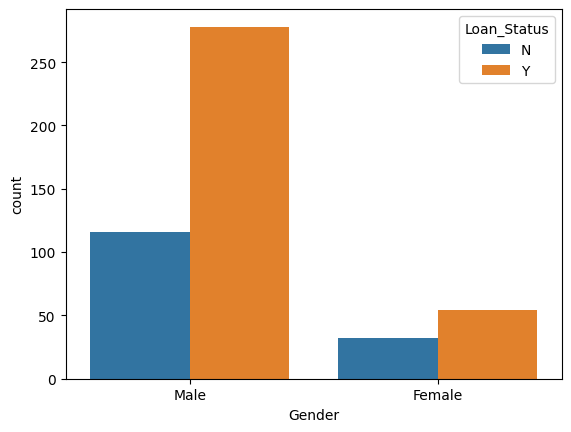

In [50]:
sns.countplot(x='Gender',data=data,hue='Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

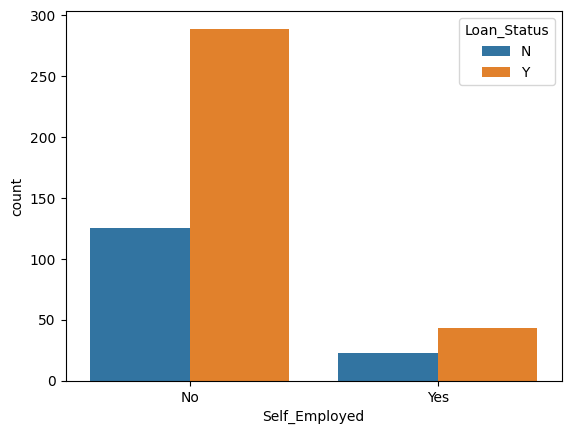

In [51]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

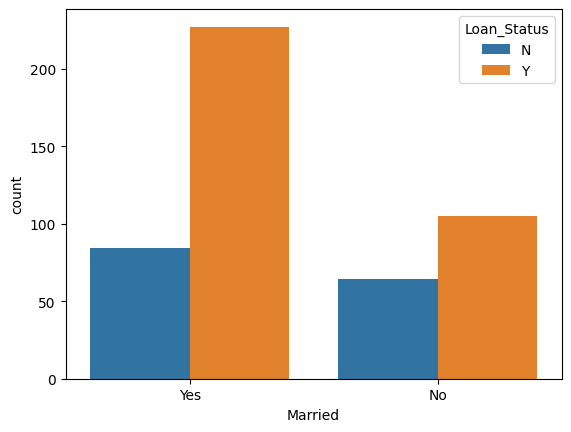

In [52]:
sns.countplot(x='Married',data=data,hue='Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

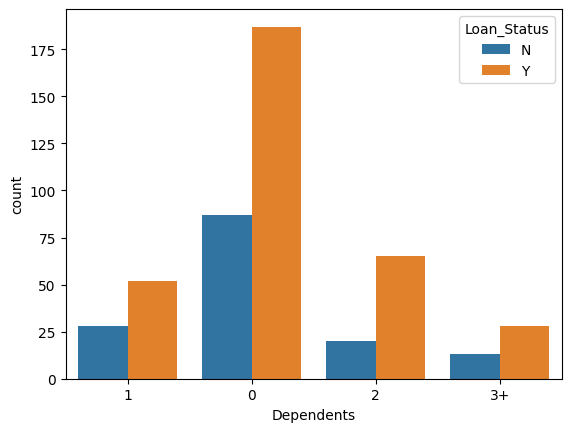

In [53]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

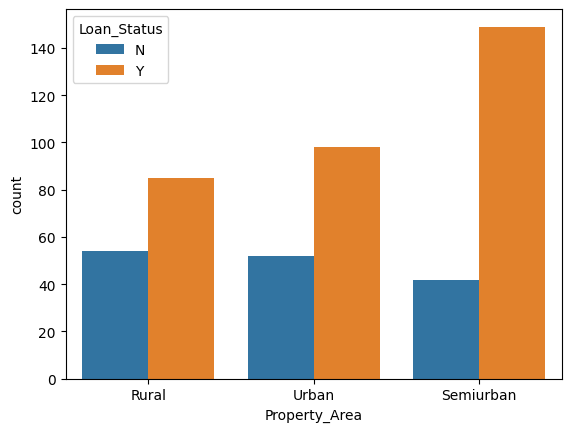

In [54]:
sns.countplot(x='Property_Area',data=data,hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='count'>

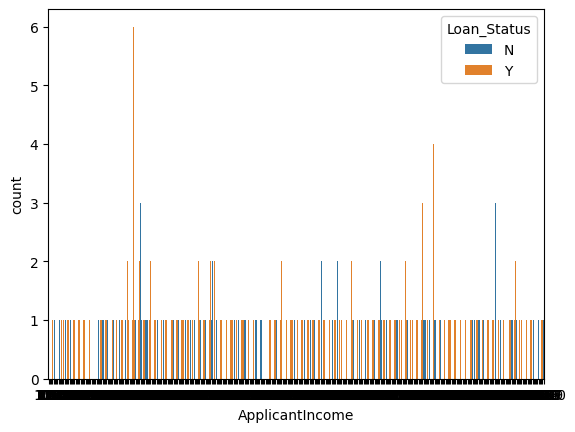

In [55]:
sns.countplot(x='ApplicantIncome',data=data,hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

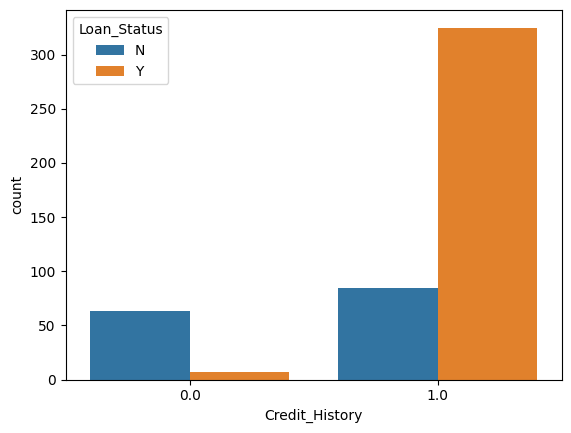

In [56]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

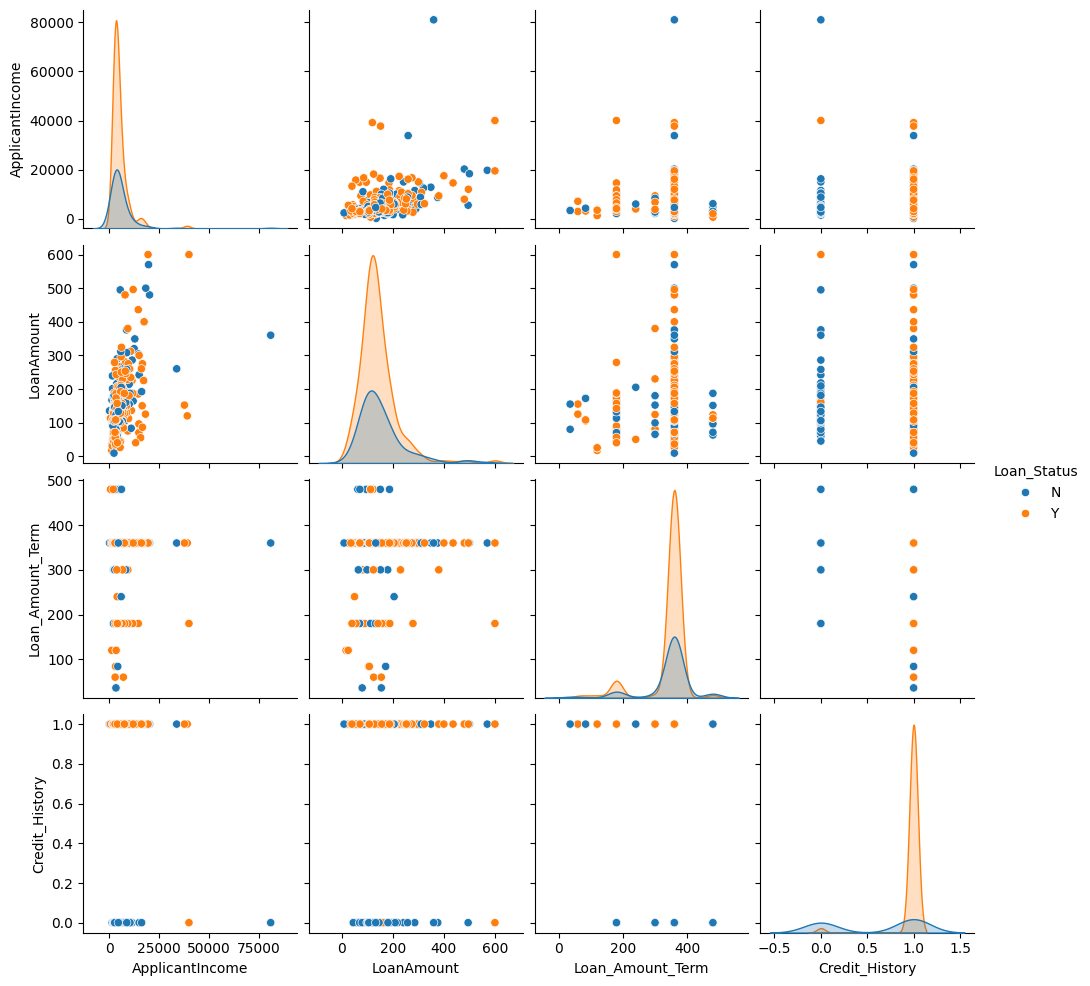

In [57]:
sns.pairplot(data,hue='Loan_Status')

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Married']=le.fit_transform(data['Married'])
data['Dependents']=le.fit_transform(data['Dependents'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
print(data)

     Gender  Married  Dependents  Self_Employed  ApplicantIncome  LoanAmount  \
1         1        1           1              0             4583       128.0   
2         1        1           0              1             3000        66.0   
3         1        1           0              0             2583       120.0   
4         1        0           0              0             6000       141.0   
5         1        1           2              1             5417       267.0   
..      ...      ...         ...            ...              ...         ...   
609       0        0           0              0             2900        71.0   
610       1        1           3              0             4106        40.0   
611       1        1           1              0             8072       253.0   
612       1        1           2              0             7583       187.0   
613       0        0           0              1             4583       133.0   

     Loan_Amount_Term  Credit_History  

**data split to dependent and independent**

In [59]:
y=data.iloc[:,0].values
x=data.iloc[:,1:].values
print(x)

[[1. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 2. 1.]
 [1. 0. 0. ... 1. 2. 1.]
 ...
 [1. 1. 0. ... 1. 2. 1.]
 [1. 2. 0. ... 1. 2. 1.]
 [0. 0. 1. ... 0. 1. 0.]]


**Data Sampling**

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)

[[1. 3. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 2. 1.]
 ...
 [0. 0. 0. ... 1. 2. 0.]
 [1. 0. 0. ... 1. 2. 1.]
 [1. 0. 0. ... 0. 2. 0.]]


# **KNN Algorithm**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
inp=[[2,3,1,500,200,3,7,1,3]]
yp=knn.predict(inp)
print(yp)

[1]


In [63]:
myknnsc=cross_val_score(knn,x_test,y_test,cv=my_kfold)
print(myknnsc)
print("Mean of kfold"+str(myknnsc.mean()))

[0.9        0.84210526 0.68421053 0.63157895 0.78947368]
Mean of kfold0.7694736842105263


In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

0.8229166666666666


<Axes: >

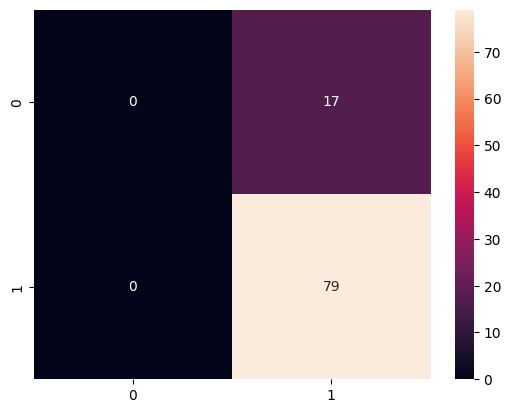

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
sns.heatmap(cm,annot=True)

# Naive-Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [67]:
y_pred=nb.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.78125


In [68]:
mynbsc=cross_val_score(nb,x_test,y_test,cv=my_kfold)
print(mynbsc)
print("Mean of kfold"+str(mynbsc.mean()))

[0.7        0.89473684 0.73684211 0.52631579 0.57894737]
Mean of kfold0.6873684210526315


# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred=dt.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.7395833333333334


In [71]:
mydtsc=cross_val_score(dt,x_test,y_test,cv=my_kfold)
print(mydtsc)
print("Mean of kfold"+str(mydtsc.mean()))

[0.85       0.63157895 0.84210526 0.68421053 0.73684211]
Mean of kfold0.7489473684210526


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=rf.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)


0.8125


In [74]:
myrfsc=cross_val_score(rf,x_test,y_test,cv=my_kfold)
print(myrfsc)
print("Mean of kfold"+str(myrfsc.mean()))

[0.85       0.89473684 0.78947368 0.57894737 0.78947368]
Mean of kfold0.7805263157894737


# SVM Linear

In [75]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [76]:
y_pred=svm_model.predict(x_test)
ac=accuracy_score(y_test,y_pred)
print(ac)

0.84375


In [77]:
joblib.dump(svm_model,'loan_model.joblib')

['loan_model.joblib']